In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

In [3]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2022-10-03


'2022-10-03'

In [4]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [5]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'

StartHue1 = Color(purple)
tub1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
tub2color = list(StartHue2.range_to(Color(lightorange),3))
print(tub1color,tub2color)

palette = [grey,cyan] + list(map(Color.get_hex,tub1color)) + list(map(Color.get_hex,tub2color)) + [green]
parameters = [GrowthRate]#,Length,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Join Data

In [6]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [6]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-10:] != 'results.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/growth-rate/2022-09-20_dynamics_tub06uM_results.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/growth-rate/2022-09-20_dynamics_tub08uM_results.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/growth-rate/2022-09-20_dynamics_tub10uM_results.csv'),
 WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/growth-rate/2022-09-20_dynamics_tub12uM_results.csv')]

In [7]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = pd.concat([data,d])


In [8]:
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues
0,2022-08-19,Brandi,1.0,6.0,4.7080,14.307000,0.329070,0.838991,5.0290,NaN,NaN,False
1,2022-08-19,Brandi,1.0,6.0,0.5350,1.715167,0.311923,0.755324,0.6955,0.041833,16.625498,False
2,2022-08-19,Brandi,1.0,6.0,1.5515,5.103667,0.303997,2.554157,1.7655,0.251000,7.033865,False
3,2022-08-19,Brandi,1.0,6.0,1.3910,3.012000,0.461819,2.930657,1.3375,0.209167,6.394422,False
4,2022-08-19,Brandi,1.0,6.0,2.1400,6.526000,0.327919,1.257324,2.3540,0.083667,28.135458,False
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022-09-14,Brandi,4.0,12.0,21.4000,23.175667,0.923382,6.205278,21.6140,1.004000,21.527888,False
96,2022-09-14,Brandi,4.0,12.0,10.8070,9.538000,1.133047,1.436278,10.8070,0.502000,21.527888,False
97,2022-09-14,Brandi,4.0,12.0,13.2680,15.394667,0.861857,12.145611,12.7330,0.167333,76.093625,False
98,2022-09-14,Brandi,4.0,12.0,9.4160,9.789000,0.961896,0.934278,13.5890,0.251000,54.139442,True


In [9]:
data.to_csv(path/(date+'_MasterSheet.csv'), encoding='utf-8', index=False)

## Open Master Data

In [7]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')

In [8]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/Data/Growth curve data/growth-rate/Plots')

In [9]:
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues
0,2022-08-19,Brandi,1.0,6.0,4.7080,14.307000,0.329070,0.838991,5.0290,NaN,NaN,False
1,2022-08-19,Brandi,1.0,6.0,0.5350,1.715167,0.311923,0.755324,0.6955,0.041833,16.625498,False
2,2022-08-19,Brandi,1.0,6.0,1.5515,5.103667,0.303997,2.554157,1.7655,0.251000,7.033865,False
3,2022-08-19,Brandi,1.0,6.0,1.3910,3.012000,0.461819,2.930657,1.3375,0.209167,6.394422,False
4,2022-08-19,Brandi,1.0,6.0,2.1400,6.526000,0.327919,1.257324,2.3540,0.083667,28.135458,False
...,...,...,...,...,...,...,...,...,...,...,...,...
647,2022-09-14,Brandi,4.0,12.0,21.4000,23.175667,0.923382,6.205278,21.6140,1.004000,21.527888,False
648,2022-09-14,Brandi,4.0,12.0,10.8070,9.538000,1.133047,1.436278,10.8070,0.502000,21.527888,False
649,2022-09-14,Brandi,4.0,12.0,13.2680,15.394667,0.861857,12.145611,12.7330,0.167333,76.093625,False
650,2022-09-14,Brandi,4.0,12.0,9.4160,9.789000,0.961896,0.934278,13.5890,0.251000,54.139442,True


## Seaborn Plot

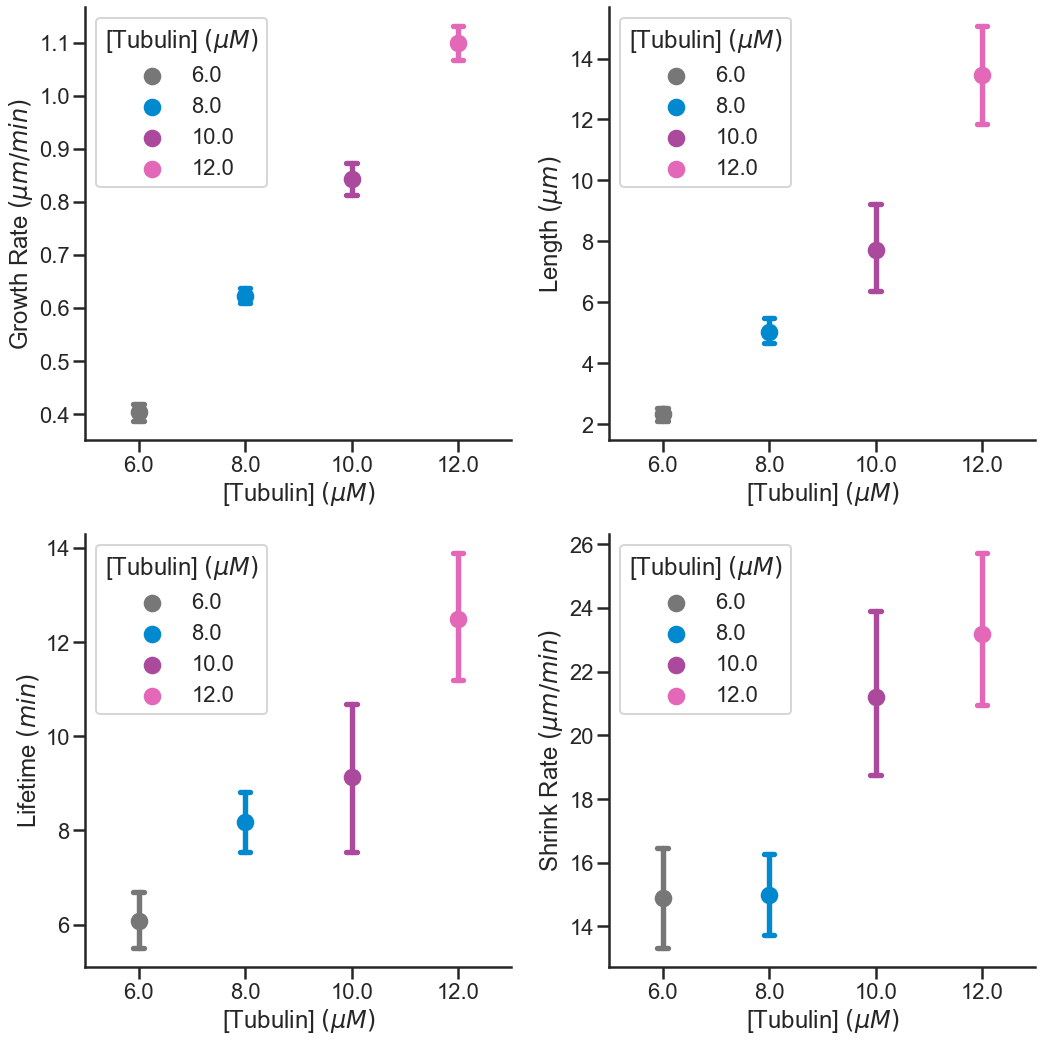

In [58]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=tubulin, y=parameters[c],
                        hue=tubulin, style = tubulin , err_style="bars", marker='o', join=False, capsize=.1,
                        data=data,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('plots'+date+'.pdf'))
plt.savefig(path/('plots'+date+'.png'))

## Data Fit

In [20]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

# def exponential(x, scale):
#     return ((np.exp(-x/scale) )/(scale))

# def gamma(x, shape, scale):
#     return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))

In [71]:
def make_hist(data, c, r) :
    
    selectdata = data[(data[tubulin]==r)]
    
    # if c == GrowthRate :
    maxbin = 1.5
    binsize = 0.05
#     elif parameter == ShrinkageRate :
#         maxbin = 15
#         binsize = 0.1
    # else:
    #     maxbin = 30
    #     binsize = 1
        
    n, bins, patches = plt.hist(selectdata[c], bins=np.arange(0, maxbin + binsize, binsize), density=True);
    plt.clf()
       
    return n, bins

In [89]:
def equation_fit(data, c):
    
    # if (c ==  GrowthRate) :
    equation = gaussian
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for r in data[tubulin].unique(): #creating a histogram of data assigned to each unique x-value! This is how to create a separate mean for each group/bin!

        n, bins =  make_hist(data, c, r)      
        if np.isnan(np.sum(n)) == True:
                continue

#         if equation == gamma :
#             coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
#         else :
        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

        variance = np.diagonal(var_matrix) #Refer [3]
        SE = np.sqrt(variance) #Refer [4]

            #======Making a data frame========
        results0 = pd.DataFrame(columns=[] , index=[])
        for k in np.arange(0,len(coeff)):
            header = [np.array([c]),np.array(['Coefficient '+ str(k)])]
            r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
            results0 = pd.concat([results0, r0], axis=1, sort=False)

        results0[tubulin] = r
            

        results = pd.concat([results, results0], sort=False)

    return results

In [90]:
# newmydir = path/(date+'_fitdata')
# newmydir.mkdir(exist_ok=True)
# newmydir

In [91]:
GrowthRateFit = equation_fit(data, GrowthRate)

C:\Users\Brandi\anaconda3\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<Figure size 432x288 with 0 Axes>

In [92]:
GrowthRateFit = GrowthRateFit.rename(columns={'Coefficient 0': 'Mean'})

ResultFit = pd.concat([GrowthRateFit], axis=1, sort=False)
ResultFit = ResultFit.loc[:,~ResultFit.columns.duplicated()]

ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

Growth Rate $(\mu m / min)$               [Tubulin] $(\mu M)$
                             Mean Coefficient 1                    
Value                    0.357493      0.091165                 6.0
SE                       0.004694      0.003832                 6.0
Value                    0.589003      0.101259                 8.0
SE                       0.003425      0.002797                 8.0
Value                    0.798786      0.100524                10.0
SE                       0.010161      0.008296                10.0
Value                    1.052251      0.171797                12.0
SE                       0.017078      0.014004                12.0

## Data Plotting

In [172]:
data[tubulin]

0       6.0
1       6.0
2       6.0
3       6.0
4       6.0
       ... 
647    12.0
648    12.0
649    12.0
650    12.0
651    12.0
Name: [Tubulin] $(\mu M)$, Length: 652, dtype: float64

In [168]:
untub=data[tubulin].unique()
untub

'[Tubulin] $(\\mu M)$'

In [192]:
ymean=data.groupby(tubulin).mean()
ymean


,Ch,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$
[Tubulin] $(\mu M)$,,,,,,,,
6.0,2.857143,2.313621,6.085746,0.403111,6.803381,2.303334,0.200582,14.878282
8.0,1.737705,5.027904,8.169682,0.623198,9.598002,4.997645,0.398455,14.998237
10.0,3.178571,7.724359,9.141819,0.842666,8.822542,7.817260,0.425135,21.186907
12.0,3.060000,13.465247,12.482391,1.098787,7.539860,13.826237,0.718850,23.173399


In [194]:
ystd=data.groupby(tubulin).std()
ystd

,Ch,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$
[Tubulin] $(\mu M)$,,,,,,,,
6.0,1.128704,1.348780,3.745317,0.099268,5.944081,1.349259,0.134217,9.511765
8.0,1.184976,3.252343,5.101516,0.108193,7.578300,3.252615,0.257820,10.417108
10.0,0.386459,5.409052,6.165307,0.123256,7.857857,5.479488,0.287805,9.797352
12.0,0.874094,7.705022,7.245940,0.169727,6.807545,8.111247,0.479928,12.600540


In [220]:
ymean['Growth Rate $(\mu m / min)$']

[Tubulin] $(\mu M)$
6.0     0.403111
8.0     0.623198
10.0    0.842666
12.0    1.098787
Name: Growth Rate $(\mu m / min)$, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

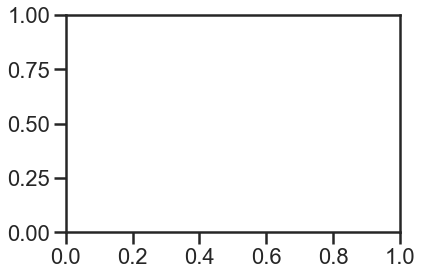

In [222]:

plt.plot(x=tubulin,y,'o')


In [1]:
#data dump into a plot w/ best fit line - need to add equation

ax = sns.lmplot(x=tubulin, y='Growth Rate $(\mu m / min)$', truncate=False, scatter_kws={"s": 12,"alpha":0.3}, aspect=1, data=data, fit_reg=True, markers='o', x_jitter=.2, palette=sns.color_palette(palette))

#note: change to truncate=True if you don't want the regression line to go across the whole plot and just where you have data

sns.despine(left=False)
sns.set_style("whitegrid")

sns.set_style("ticks")
plt.rcParams['axes.linewidth'] = 2.5

plt.xlabel('[Tubulin] $(\mu M)$', fontsize=20)
plt.ylabel('Growth Rate $(\mu m/min)$', fontsize=20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize =20)
plt.ylim(0,2)
plt.tight_layout()

plt.savefig(newmydir/('Growth Rate'+date+'.pdf'))

plt.show()

NameError: name 'sns' is not defined

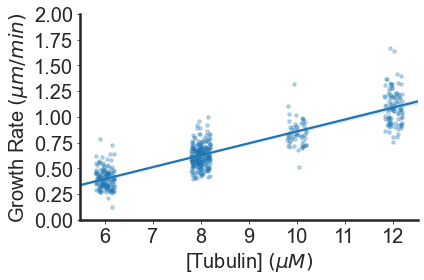

In [29]:
#regplot

ax = sns.regplot(x=tubulin, y='Growth Rate $(\mu m / min)$', truncate=False, scatter_kws={"s": 12,"alpha":0.3}, data=data, fit_reg=True, x_jitter=.2)

#note: change to truncate=True if you don't want the regression line to go across the whole plot and just where you have data

sns.despine(left=False)
sns.set_style("whitegrid")

sns.set_style("ticks")
plt.rcParams['axes.linewidth'] = 2.5

plt.xlabel('[Tubulin] $(\mu M)$', fontsize=20)
plt.ylabel('Growth Rate $(\mu m/min)$', fontsize=20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize =20)
plt.ylim(0,2)
plt.tight_layout()

plt.savefig(newmydir/('Growth Rate'+date+'.pdf'))

plt.show()

## Making a DataFrame

In [ ]:
df=data[tubulin,GR

NameError: name 'data' is not defined

NameError: name 'curve_fit' is not defined

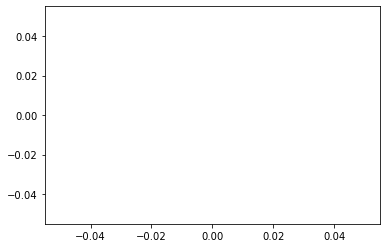

In [15]:
# plot data
df = data[data[tubulin]==GrowthRate]

plt.scatter(df[tubulin].values,df['Growth Rate $(\mu m / min)$'].values, label="data")

# Fitting
model = lambda x, A, x0, sigma, offset:  offset+A*np.exp(-((x-x0)/sigma)**2)
popt, pcov = curve_fit(model, df[tubulin].values, 
                              df['Growth Rate $(\mu m / min)$'].values, p0=[1,0,2,0])
#plot fit
x = np.linspace(df[tubulin].values.min(),df[tubulin].values.max(),250)
pt.plot(x,model(x,*popt), label="fit")

# Fitting
model2 = lambda x, sigma:  model(x,1,0,sigma,0)
popt2, pcov2 = curve_fit(model2, df[tubulin].values, 
                              df['Growth Rate $(\mu m / min)$'].values, p0=[2])


#pt.xlim(None,10)
plt.legend()
plt.show()

In [16]:
data['Growth Rate $(\mu m / min)$'].mean()

0.6726867410813716